# Proyek Analisis Data: [bike sharing dataset]
- **Nama:** Ninda Kartika Putri
- **Email:** nindakartika.22020@mhs.unesa.ac.id
- **ID Dicoding:** ninda_kartika_putri

## Menentukan Pertanyaan Bisnis

- Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan season?
- Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan weekday?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
import pandas as pd
from pandas import read_csv
from mpl_toolkits.mplot3d import Axes3D

# Definisikan palet warna
colors = sns.color_palette("husl", 4)


## Data Wrangling

### Gathering Data


In [3]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight:

- Kita mendapatkan informasi tentang data rental sepeda pada tiap hari

### Assessing Data

In [4]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- kode diatas digunakan untuk menemukan missing value kolom

### Cleaning Data

In [5]:
column = "dteday"
hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- kode diatas digunakan untuk membersihkan tipe data

## Exploratory Data Analysis (EDA)

### Explore ...

In [6]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- kode diatas digunakan untuk mengeksplorasi data hour_df

In [12]:
hour_df.groupby(by=["season", "yr", "weekday"]).agg({
    "instant":"nunique",
    "cnt" : ["sum", "max", "min", "mean"]
})

instant    cnt                     
                  nunique    sum  max min        mean
season yr weekday                                    
1      0  0           303  18582  308   1   61.326733
          1           280  18000  271   1   64.285714
          2           263  18850  282   1   71.673004
          3           295  23260  405   1   78.847458
          4           290  23283  356   1   80.286207
          5           303  25851  332   1   85.316832
          6           334  22174  313   1   66.389222
       1  0           335  41613  554   1  124.217910
          1           332  45771  801   1  137.864458
          2           308  50963  801   1  165.464286
          3           287  42017  782   1  146.400697
          4           288  49072  746   1  170.388889
          5           312  48413  566   1  155.169872
          6           312  43499  690   1  139.419872
2      0  0           311  51567  459   2  165.810289
          1           333  52741  601   1  158.381381
          2           312  48136  611   1  154.282051
          3           311  45646  638   1  146.771704
          4           312  49404  594   1  158.346154
          5           312  48363  564   1  155.009615
          6           312  51459  506   3  164.932692
       1  0           312  78083  686   4  250.266026
          1           311  70514  834   1  226.733119
          2           312  77313  850   1  247.798077
          3           335  84901  873   1  253.435821
          4           312  85803  869   1  275.009615
          5           312  87429  957   2  280.221154
          6           312  87230  730   1  279.583333
3      0  0           305  58117  491   1  190.547541
          1           311  58060  609   1  186.688103
          2           335  63922  651   1  190.811940
          3           336  62060  621   1  184.702381
          4           335  60281  628   2  179.943284
          5           312  58780  587   2  188.397436
          6           306  58430  497   4  190.947712
       1  0           312  80314  757   4  257.416667
          1           312  88247  968   2  282.842949
          2           312  88793  970   2  284.592949
          3           312  95994  977   3  307.673077
          4           336  99280  976   4  295.476190
          5           336  96487  894   5  287.163690
          6           336  92364  783   5  274.892857
4      0  0           312  48808  500   1  156.435897
          1           311  51420  620   2  165.337621
          2           312  49430  625   1  158.429487
          3           287  38203  593   1  133.111498
          4           288  41584  589   1  144.388889
          5           312  49012  591   1  157.089744
          6           312  47680  496   1  152.820513
       1  0           312  66943  776   2  214.560897
          1           289  70750  922   2  244.809689
          2           299  71702  967   1  239.806020
          3           312  80967  963   1  259.509615
          4           310  76688  905   2  247.380645
          5           288  73455  900   1  255.052083
          6           288  74971  760   3  260.315972

Insight:

- menampilkan korealasi antar season, yr dan weekday

Insight:
- eksplorasi hour_df ditemukan bahwa di season 5 tidak ada penyewa pada yr 2 tidak ada penyewa dan di weekday 7 tidak ada penyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan season?

<ipython-input-16-93c4a7546d1c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


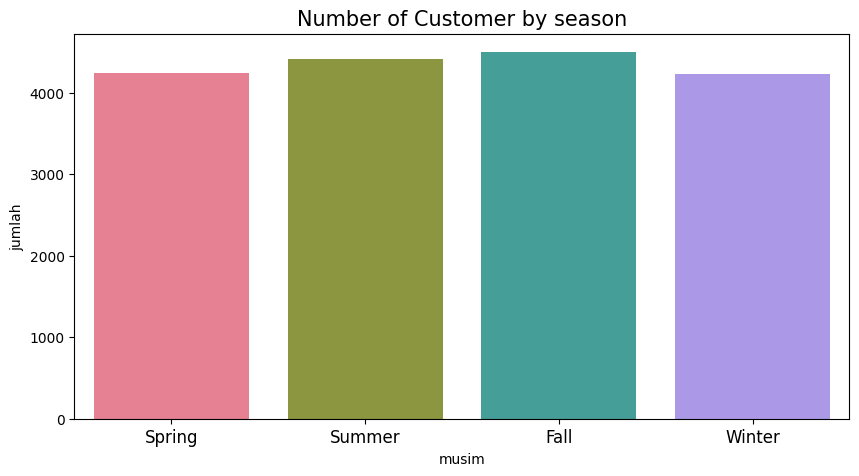

In [16]:
byseason_df = hour_df.groupby(by="season")['instant'].nunique().reset_index()
byseason_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="season",
    data=byseason_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by season", loc="center", fontsize=15)
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.ylabel('jumlah')
plt.xlabel('musim')
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
Berdasarkan Visualisasi number of customer by season, musim fall merupakan penyewa terbanyak sedangkan di musim winter merupakan terendah

### Pertanyaan 2:Bagaimana Demografi Pelanggan penyewa sepeda berdasarkan weekday?

<ipython-input-18-f087c61d8fb9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-18-f087c61d8fb9>:8: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


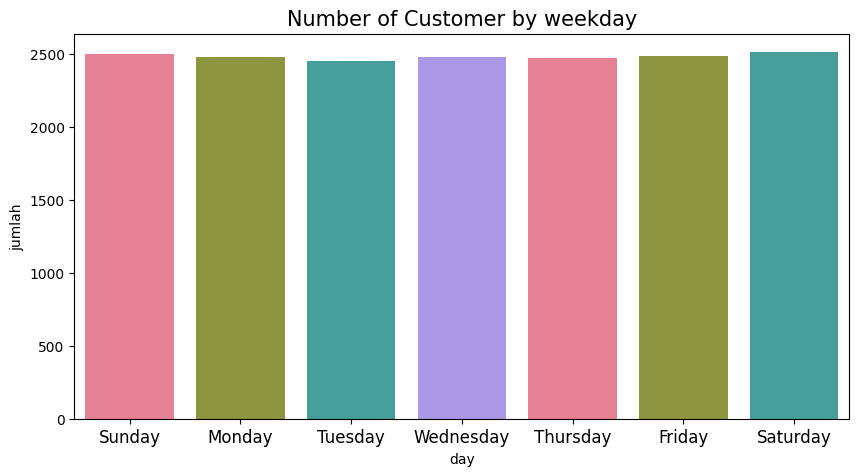

In [18]:
byweekday_df = hour_df.groupby(by="weekday")['instant'].nunique().reset_index()
byweekday_df.rename(columns={
    "instant": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="weekday",
    data=byweekday_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by weekday", loc="center", fontsize=15)
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.ylabel('jumlah')
plt.xlabel('day')
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**

Berdasarkan visualisasi number of customer by weekday yaitu hari friday, saturday, sunday merupakan hari dengan penyewa terbanyak

## Analisis Lanjutan (Opsional)

In [19]:
import pandas as pd

# Convert the 'dteday' column to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# We assume that registered users represent those most relevant for RFM analysis
# Create a summary table for Recency, Frequency, and Monetary (based on 'registered' rentals)

# Recency: Calculate the most recent rental date and days since then
current_date = hour_df['dteday'].max()  # Ganti hour_df_df dengan hour_df
hour_df['recency'] = (current_date - hour_df['dteday']).dt.days  # Ganti hout_df dengan hour_df dan gunakan dt.days

# Frequency: Count how many times the service was used (hanya menghitung penyewa terdaftar)
frequency = hour_df['registered'].sum()

# Monetary: Total rentals (assuming the total rentals by registered users represent the monetary value)
monetary = hour_df['registered'].sum()

# Create the RFM DataFrame
rfm_data = pd.DataFrame({
    'recency': [hour_df['recency'].min()],
    'frequency': [frequency],
    'monetary': [monetary]
})

print(rfm_data)  # Menampilkan DataFrame RFM


   recency  frequency  monetary
0        0    2672662   2672662


**Insight:**
- Recency parameter yang digunakan untuk melihat kapan terakhir seorang penyewa melakukan transaksi sebesar 0
- Frequency parameter ini digunakan untuk mengidentifikasi seberapa sering seorang penyewa melakukan transaksi sebesar 2672662
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari penyewa tersebut sebesar 2672662

## Conclusion

**Kesimpulan Pertanyaan no 1**
Berdasarkan grafik yang ditampilkan:

- Musim Panas (Summer) biasanya merupakan musim dengan jumlah penyewaan sepeda cukup tinggi. Cuaca yang hangat dan cerah cenderung mendorong lebih banyak orang, baik pengguna terdaftar maupun tidak terdaftar, untuk menyewa sepeda.

- Musim Gugur (Fall) jumlah penyewaan sepeda yang paling tinggi, terutama karena cuaca masih nyaman untuk bersepeda sebelum memasuki musim dingin.

- Musim Dingin (Winter) menunjukkan penurunan penyewaan yang signifikan, karena kondisi cuaca yang dingin dan kurang mendukung untuk aktivitas luar ruangan seperti bersepeda.

- Musim Semi (Spring) biasanya menjadi transisi di mana penyewaan sepeda mulai meningkat lagi setelah musim dingin, meskipun mungkin masih lebih rendah dibandingkan musim panas.

Penyewaan sepeda cenderung mengikuti pola musiman, di mana musim panas dan gugur merupakan puncak tertinggi dalam hal jumlah penyewaan, sedangkan musim dingin mengalami penurunan signifikan. Strategi promosi atau penawaran musiman dapat disesuaikan untuk memaksimalkan penyewaan di musim panas dan membantu mengatasi penurunan penyewaan di musim dingin.

**Kesimpulan Pertanyaan no 2**
Berdasarkan grafik yang ditampilkan, jumlah pelanggan penyewa sepeda berdasarkan hari dalam seminggu (weekday) relatif konsisten, tetapi ada beberapa perbedaan kecil.

Kesimpulan yang bisa diambil:
Tidak ada hari yang jumlah pelanggannya jauh lebih tinggi atau lebih rendah. Ini menunjukkan bahwa penggunaan sepeda cukup stabil sepanjang minggu.
Hari Selasa dan Kamis memiliki jumlah pelanggan yang sedikit lebih rendah, sementara hari sabtu dan minggu cenderung lebih tinggi, meskipun perbedaannya tidak terlalu besar.
Secara keseluruhan, jumlah penyewa sepeda tidak terlalu dipengaruhi oleh hari dalam seminggu, karena permintaannya cenderung stabil setiap hari.










## Analisis lanjutan
layanan penyewaan sepeda berdasarkan cuaca dan waktu menunjukkan bahwa cuaca yang baik secara signifikan meningkatkan jumlah penyewaan, sementara cuaca buruk mengurangi minat pelanggan. Hubungan antara cuaca dan waktu menciptakan peluang bagi perusahaan untuk mengembangkan strategi pemasaran yang efisien, seperti promosi ketika cuaca mendukung dan menyediakan fasilitas tambahan untuk penyewaan . Penelitian lebih lanjut dapat dilakukan untuk mengeksplorasi jenis sepeda atau layanan lain yang sesuai dengan preferensi pelanggan. Dengan mengintegrasikan temuan-temuan ini, perusahaan dapat meningkatkan pengalaman pelanggan dan tarif sewa secara keseluruhan. namun Jika data individu penyewa tersedia, analisis clustering dapat digunakan untuk mengidentifikasi perilaku pengguna dengan lebih spesifik, seperti berapa kali mereka menyewa, kapan terakhir kali mereka menggunakan layanan, dan seberapa besar nilai yang mereka berikan. Dengan pendekatan ini, perusahaan dapat merancang strategi pemasaran yang lebih terarah




